In [351]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns 
sns.set()

This research proposal will investigate causes of death in US inpatient medical facilities and how they have changed from 2008 vs 2018. With major advances in many areas of healthcare over the last decade, the purpose of the study is evaluate whether this data can improve decisions related to future hospital center expansions. 

Query Criteria:\
Title:	US Cause of death 2008 and 2018 in medical facilities in two year increments

Place of Death: Medical Facility - Inpatient
                
Year/Month:	2008, 2010, 2012, 2014, 2016, and 2018\
Group by: Cause of death; Ten-Year Age Groups; Gender\
Calculate Rates Per:	100,000\
Basic search criteria example:\
https://wonder.cdc.gov/controller/saved/D76/D82F820

Good resource to understand death rate calculations:
https://www.stats.indiana.edu/vitals/CalculatingARate.pdf


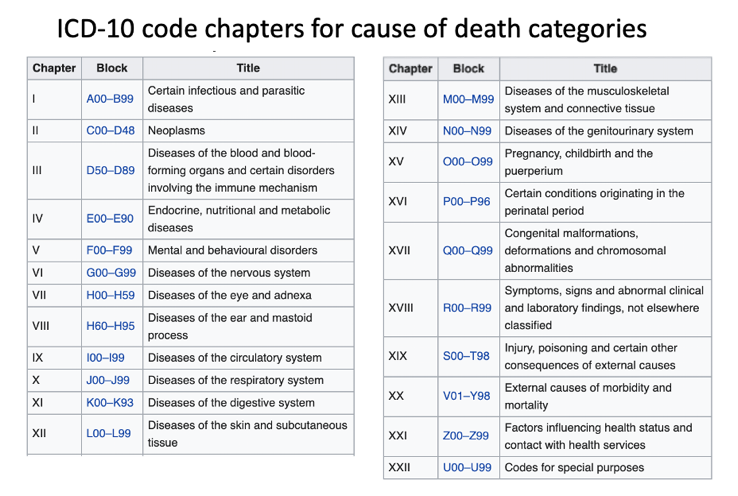

Centers for Disease Control and Prevention, National Center for Health Statistics. Underlying Cause of Death 1999-2018 on CDC WONDER Online Database, released in 2020. Data are from the Multiple Cause of Death Files, 1999-2018, as compiled from data provided by the 57 vital statistics jurisdictions through the Vital Statistics Cooperative Program. Accessed at http://wonder.cdc.gov/ucd-icd10.html on May 1, 2020 5:00:25 PM


In [352]:
# Local downloads from mulitple queries were required due to limits and were moved to remote repository

dfcod = pd.read_csv('https://raw.githubusercontent.com/robholmstrom/Sams_github/master/Capstone_1/COD_csv_files/US_2008-2018_COD_chapters.csv')
dfcod.info()
dfcod.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6790 entries, 0 to 6789
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Notes                       80 non-null     object 
 1   ICD-10 113 Cause List       6710 non-null   object 
 2   ICD-10 113 Cause List Code  6710 non-null   object 
 3   Ten-Year Age Groups         6710 non-null   object 
 4   Ten-Year Age Groups Code    6710 non-null   object 
 5   Gender                      6710 non-null   object 
 6   Gender Code                 6710 non-null   object 
 7   Year                        6710 non-null   float64
 8   Year Code                   6710 non-null   float64
 9   Deaths                      6710 non-null   float64
 10  Population                  6710 non-null   object 
 11  Crude Rate                  6710 non-null   object 
dtypes: float64(3), object(9)
memory usage: 636.7+ KB


,Notes,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,#Salmonella infections (A01-A02),GR113-001,< 1 year,1,Female,F,2010.0,2010.0,1.0,Not Applicable,Not Applicable
1,NaN,#Salmonella infections (A01-A02),GR113-001,< 1 year,1,Female,F,2012.0,2012.0,1.0,Not Applicable,Not Applicable
2,NaN,#Salmonella infections (A01-A02),GR113-001,< 1 year,1,Male,M,2008.0,2008.0,2.0,Not Applicable,Not Applicable
3,NaN,#Salmonella infections (A01-A02),GR113-001,< 1 year,1,Male,M,2012.0,2012.0,1.0,Not Applicable,Not Applicable
4,NaN,#Salmonella infections (A01-A02),GR113-001,< 1 year,1,Male,M,2014.0,2014.0,2.0,Not Applicable,Not Applicable
5,NaN,#Salmonella infections (A01-A02),GR113-001,< 1 year,1,Male,M,2018.0,2018.0,2.0,Not Applicable,Not Applicable
6,NaN,#Salmonella infections (A01-A02),GR113-001,1-4 years,4-Jan,Female,F,2008.0,2008.0,1.0,Not Applicable,Not Applicable
7,NaN,#Salmonella infections (A01-A02),GR113-001,1-4 years,4-Jan,Female,F,2012.0,2012.0,1.0,Not Applicable,Not Applicable
8,NaN,#Salmonella infections (A01-A02),GR113-001,1-4 years,4-Jan,Female,F,2014.0,2014.0,1.0,Not Applicable,Not Applicable
9,NaN,#Salmonella infections (A01-A02),GR113-001,1-4 years,4-Jan,Male,M,2012.0,2012.0,1.0,Not Applicable,Not Applicable


In [353]:


# Get rid of unnecessary columns that were adding null values or just noise

dfcod.drop(['Gender Code','Notes', 'Population', 'Ten-Year Age Groups Code', 'Crude Rate', 'Year Code', 'ICD-10 113 Cause List Code'], axis = 1, inplace = True)
dfcod.dropna(inplace = True)

# Rename some columns for clarity:

dfcod.rename(columns = {'Deaths': 'Deaths per 100,000', 
                        'Ten-Year Age Groups':'Age range', 
                        'ICD-10 113 Cause List': 'Cause of death'}, 
                          inplace = True)



dfcod.info() # Ensure that all columns do not contain null values



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6710 entries, 0 to 6709
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cause of death      6710 non-null   object 
 1   Age range           6710 non-null   object 
 2   Gender              6710 non-null   object 
 3   Year                6710 non-null   float64
 4   Deaths per 100,000  6710 non-null   float64
dtypes: float64(2), object(3)
memory usage: 314.5+ KB


In [416]:
dfcod.head(3) # Example of table without the total population data--more clean up will happen later on




,Cause of death,Age range,Gender,Year,"Deaths per 100,000"
0,#Salmonella infections (A01-A02),< 1 year,Female,2010.0,1.0
1,#Salmonella infections (A01-A02),< 1 year,Female,2012.0,1.0
2,#Salmonella infections (A01-A02),< 1 year,Male,2008.0,2.0


<BarContainer object of 71 artists>

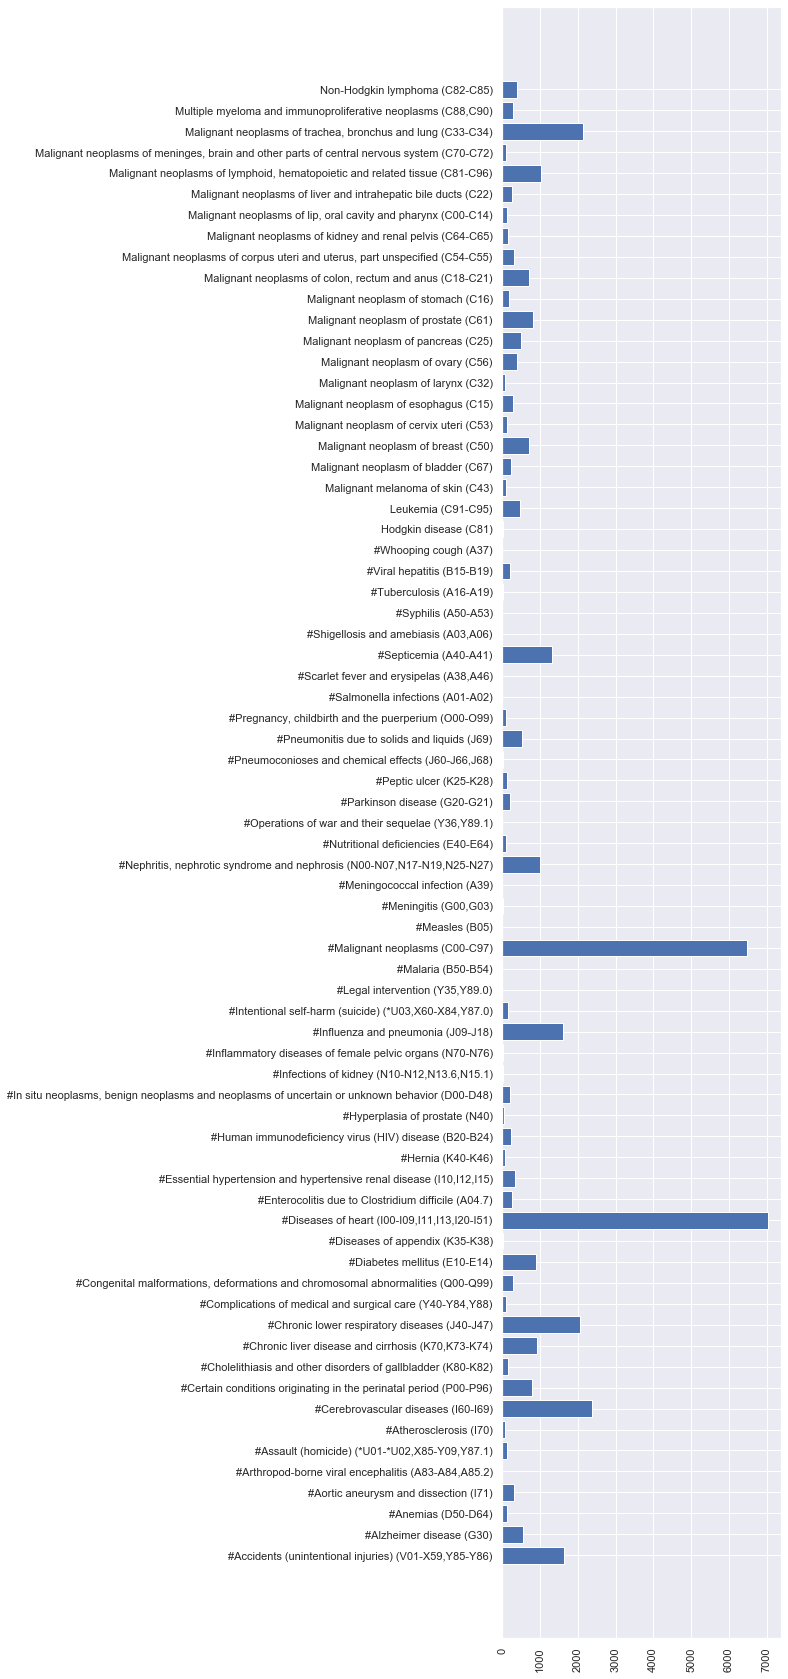

In [389]:
groupedcod = dfcod.groupby('Cause of death').mean()[['Deaths per 100,000']].reset_index()
plt.figure(figsize=(5,30))
plt.xticks(rotation=90)
plt.barh(groupedcod['Cause of death'], width=groupedcod['Deaths per 100,000'])

# Here an expanded view of the average causes of death over the 10 years (2008-2018)

Below, I want to conduct exploratory analysis of the dfcod. Want to look summarized unique list of causes of death in order to condense

In [415]:
# Use this to convert cause of death column to a list: list = df['Name'].values.tolist()
cod = dfcod['Cause of death'].values.tolist()

# Get unique cods and place into a dataframe column. Will populate adjacent column with broader designation

codunique = [] 
for x in cod: # Generate unique list with all causes of deaths
    if x not in codunique:
        codunique.append(x)

icd10 = []
for x in codunique: # Generate list with all ICD codes that match the unique cause of death list
    codepos = len(x.split(' '))-1 # position of icd code in each cause of death string in the list
    rawcode = x.split(' ')[codepos] # defines the icd code from codunique string with paretheses
    code = rawcode[1:len(rawcode)-1] # removes paretheses
    icd10.append(code)

# import a list of ICD chapters and how they match with codes:    
icdchapters = pd.read_csv('https://raw.githubusercontent.com/robholmstrom/Sams_github/master/Capstone_1/COD_csv_files/ICD10chapters.csv')
icdchapters



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 3: invalid continuation byte

In [ ]:
coddf = pd.DataFrame({'Unique causes of death':codunique, 'ICD10 code':icd10})

#Temporarily set display of rows to max in order to view all ICD coded causes of death
pd.set_option('display.max_rows', None)
coddf


In [356]:
# Reset display options to 10
pd.set_option('display.max_rows', 10)